In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

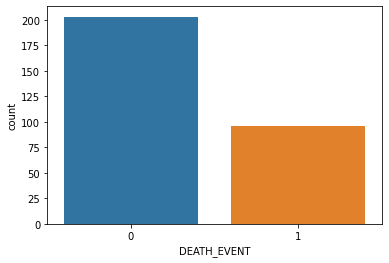

In [6]:
sns.countplot(x = 'DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

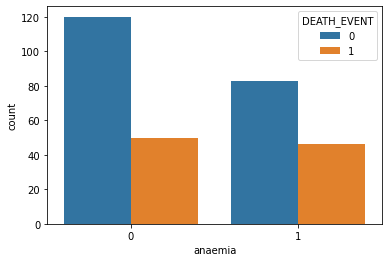

In [7]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='anaemia')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

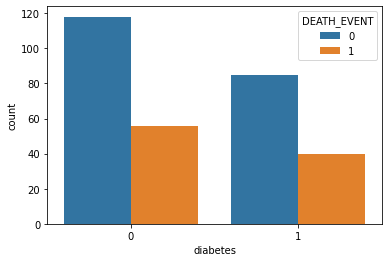

In [8]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='diabetes')

<AxesSubplot:xlabel='smoking', ylabel='count'>

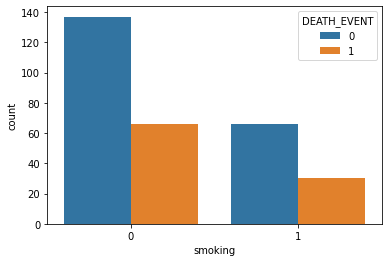

In [10]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='smoking')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

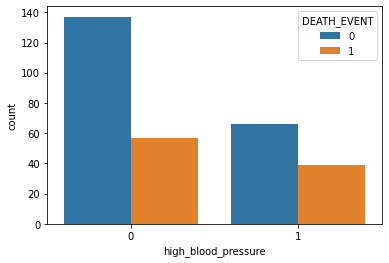

In [11]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='high_blood_pressure') 

<Figure size 1440x1440 with 0 Axes>

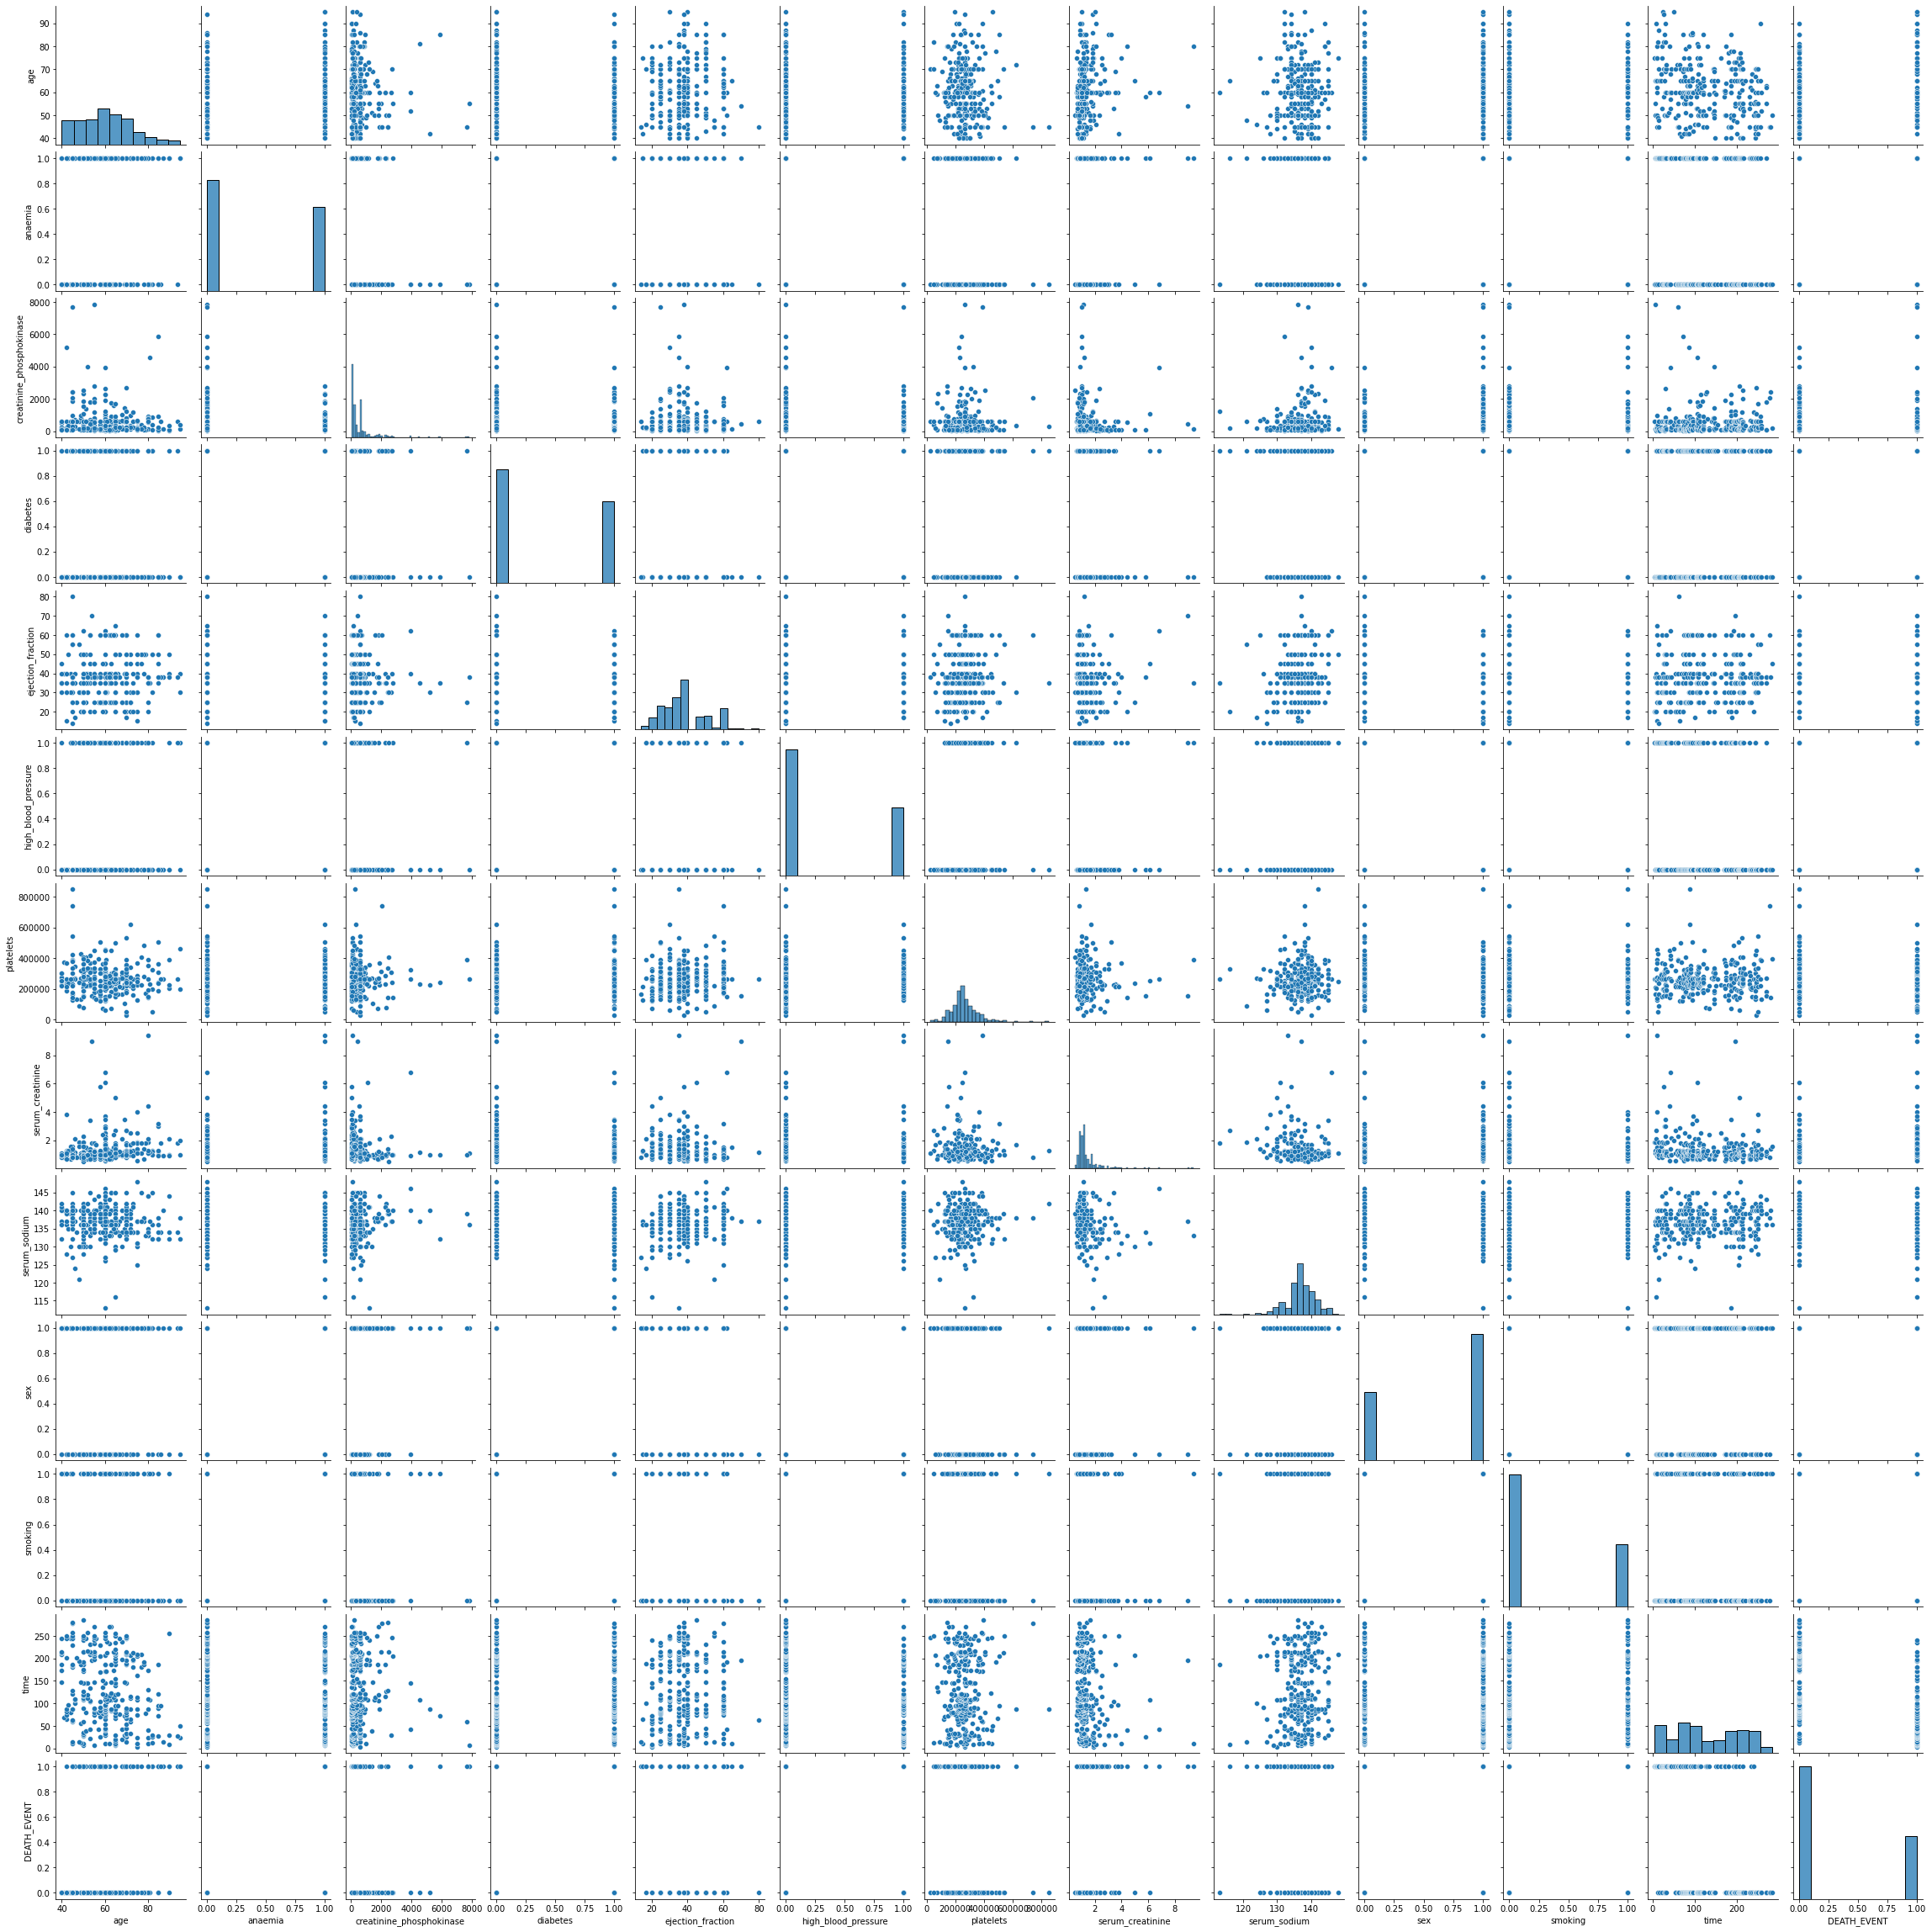

In [14]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

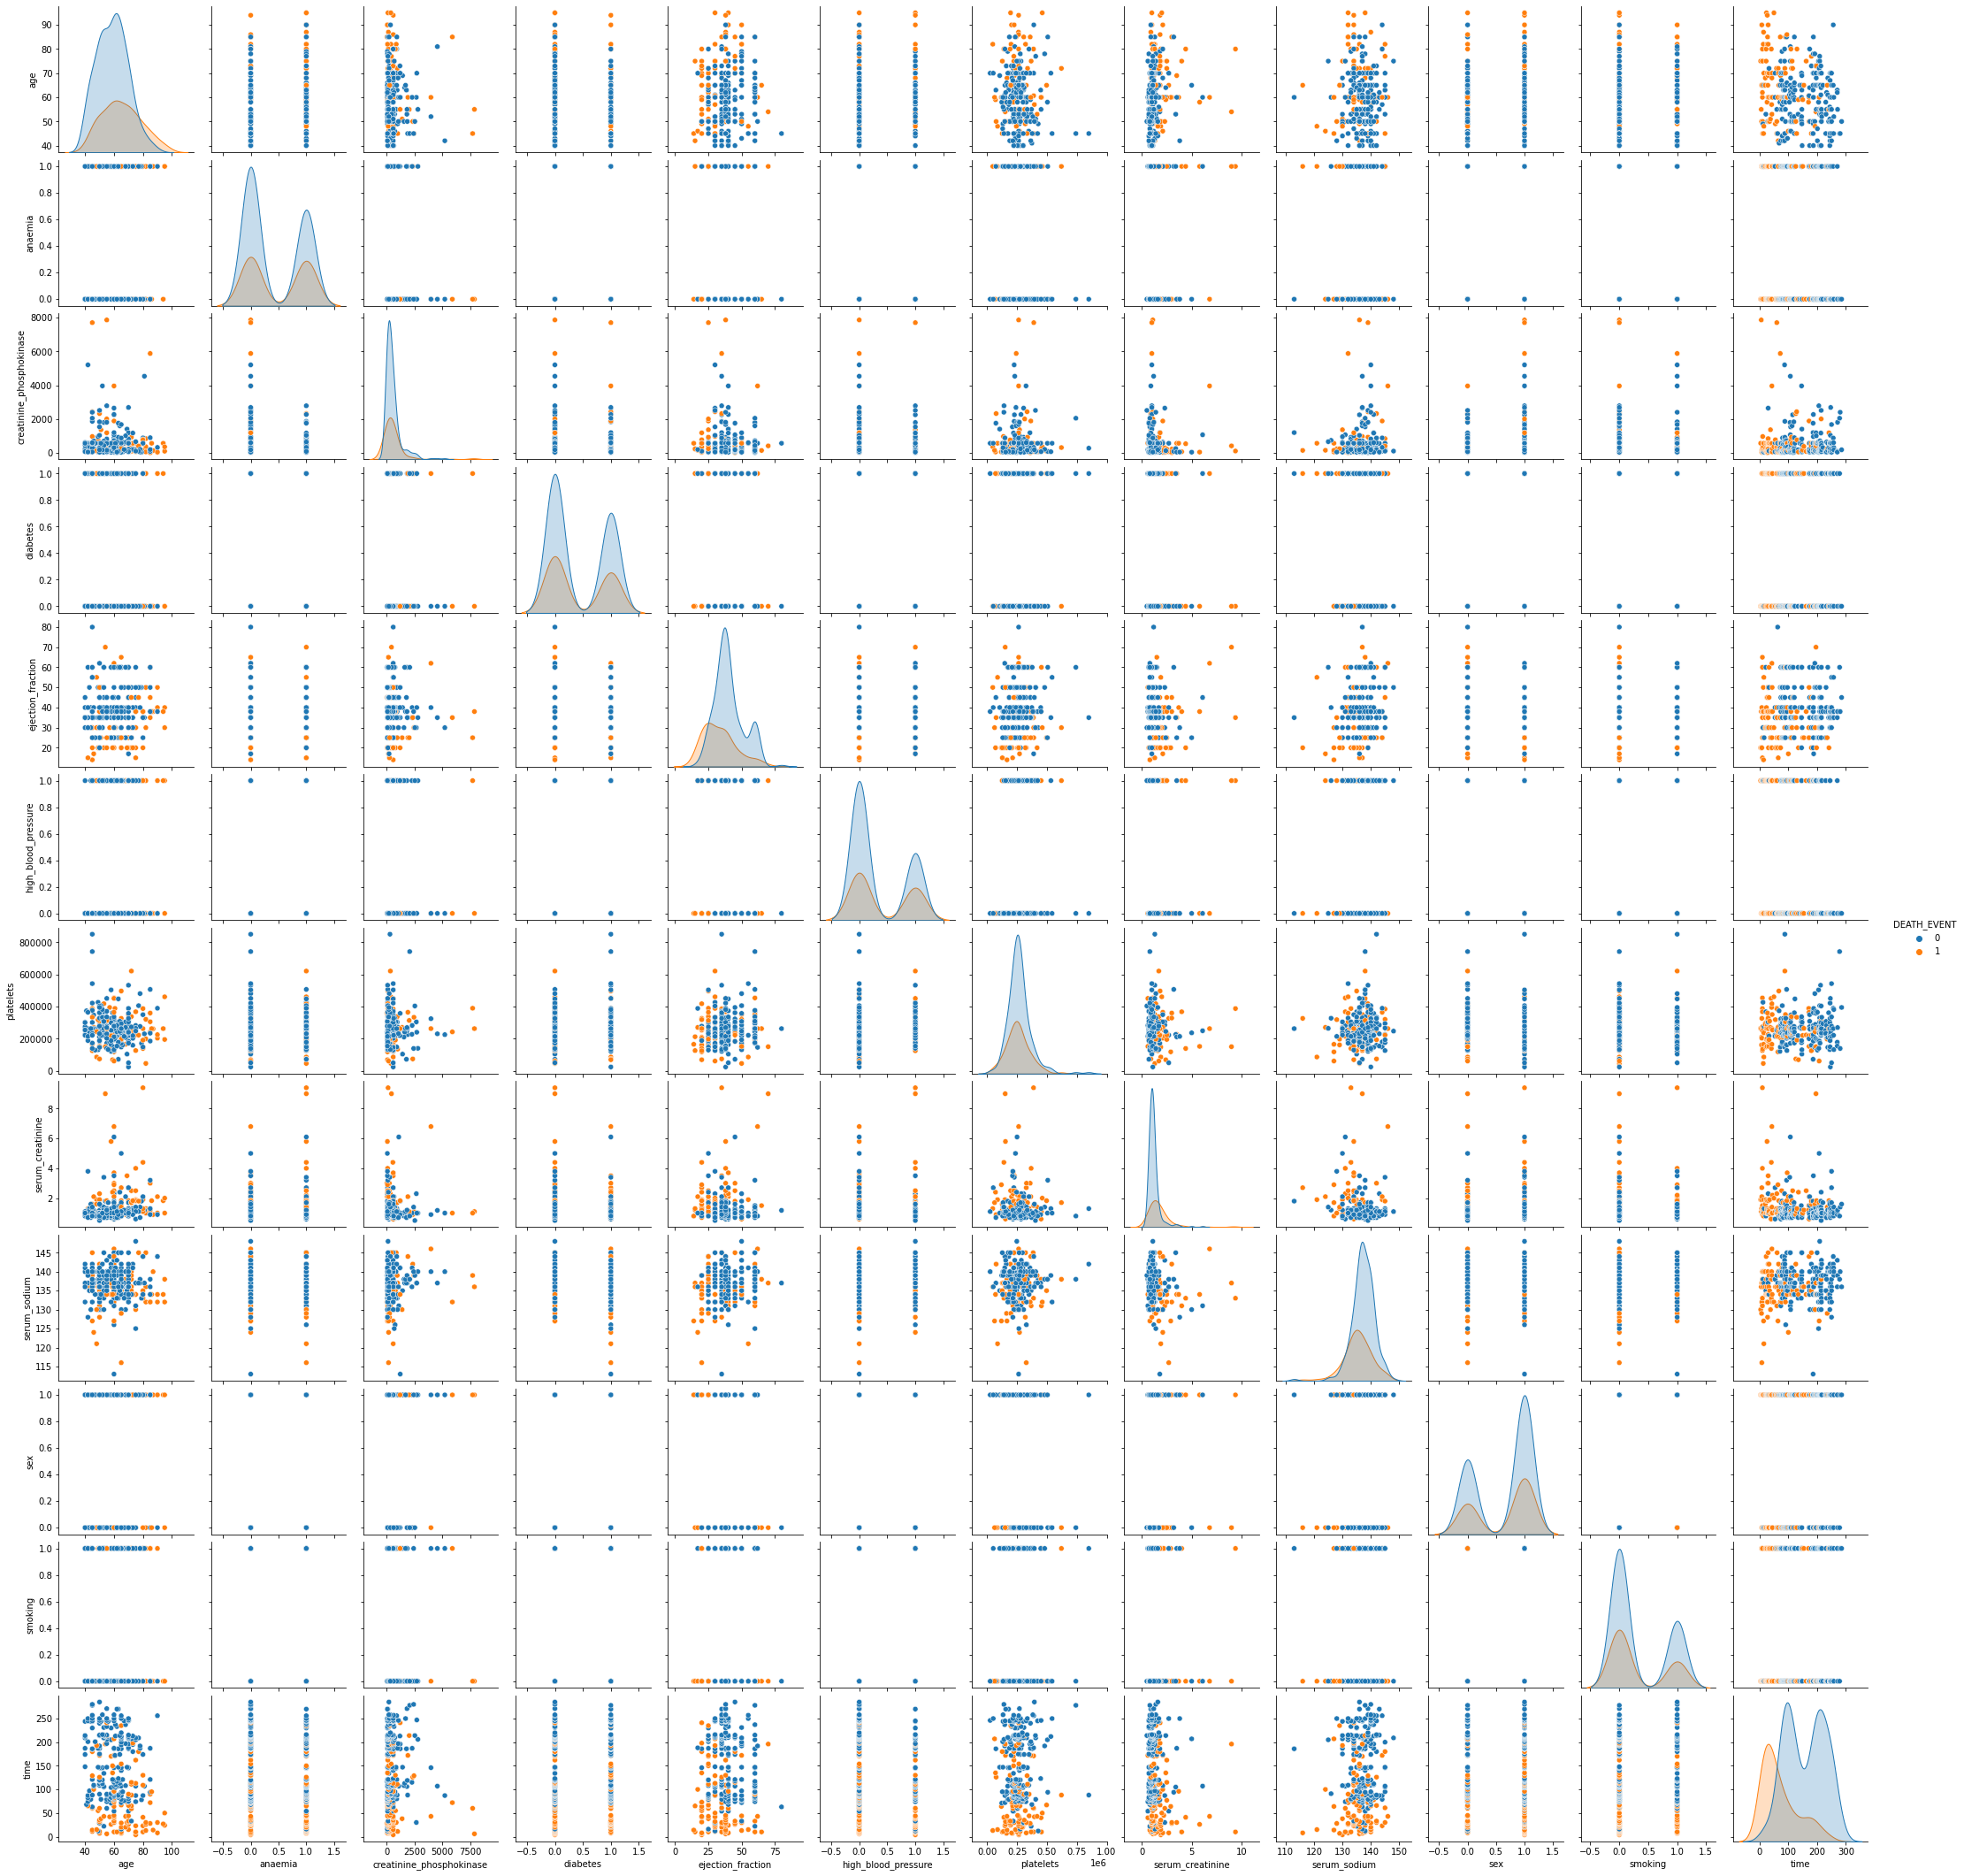

In [15]:
sns.pairplot(df, hue='DEATH_EVENT')

In [16]:
#sep x,y
x = df.drop('DEATH_EVENT',axis=1)

In [17]:
y=df['DEATH_EVENT']

In [18]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest, ytrain, ytest =  train_test_split(x,y,test_size=.25)

In [22]:
xtest.shape

(75, 12)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf=DecisionTreeClassifier()

In [25]:
clf.fit(xtrain,ytrain) #train with default parameters

DecisionTreeClassifier()

In [26]:
pred = clf.predict(xtest)

In [27]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

# Confusion Matrix

In [29]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

In [36]:
cm = confusion_matrix(ytest,pred)
cm

array([[40,  6],
       [ 9, 20]], dtype=int64)

In [37]:
acc = (40+20) / (40+20+6+9)

In [38]:
acc * 100

80.0

In [40]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        46
           1       0.77      0.69      0.73        29

    accuracy                           0.80        75
   macro avg       0.79      0.78      0.78        75
weighted avg       0.80      0.80      0.80        75



Text(33.0, 0.5, 'Actual Values')

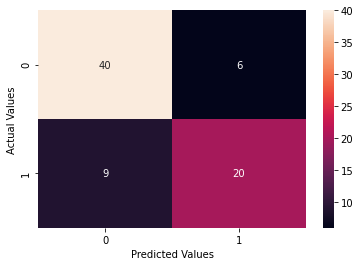

In [44]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# ROC

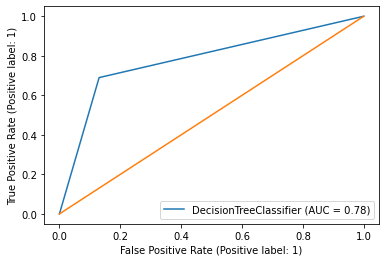

In [46]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

In [ ]:
Viz

Stata, SPSS, Tableau, Google Data Studio, PowerBi, 